In [7]:
import igraph as ig
import matplotlib.pyplot as plt
import random
import math

random.seed(0)

def plot_graphs(ncols, nrows, size_probs):
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 4), layout='constrained')
    i = 0
    palette = ig.RainbowPalette(ncols * nrows)
    for vertex_count, p in size_probs:
        g = ig.Graph.Erdos_Renyi(n=vertex_count, p=p, directed=False, loops=False)
        ig.summary(g)

        row = i // ncols
        col = i % ncols
        ig.plot(
            g,
            target=ax[row, col],
            palette=palette,
            vertex_size=5,
            vertex_color=palette.get(i),
            edge_width=0.7,
        )
        title = "Vertices={} Edges={} p={:.2} np={:0.1f}".format(len(g.vs), len(g.es), p, vertex_count * p)
        ax[row, col].set_title(title)
        i += 1

    plt.show()

def log_on_n(c, n):
    return c * math.log(n) / n


IGRAPH U--- 100 4 -- 
IGRAPH U--- 100 31 -- 
IGRAPH U--- 100 41 -- 
IGRAPH U--- 100 123 -- 


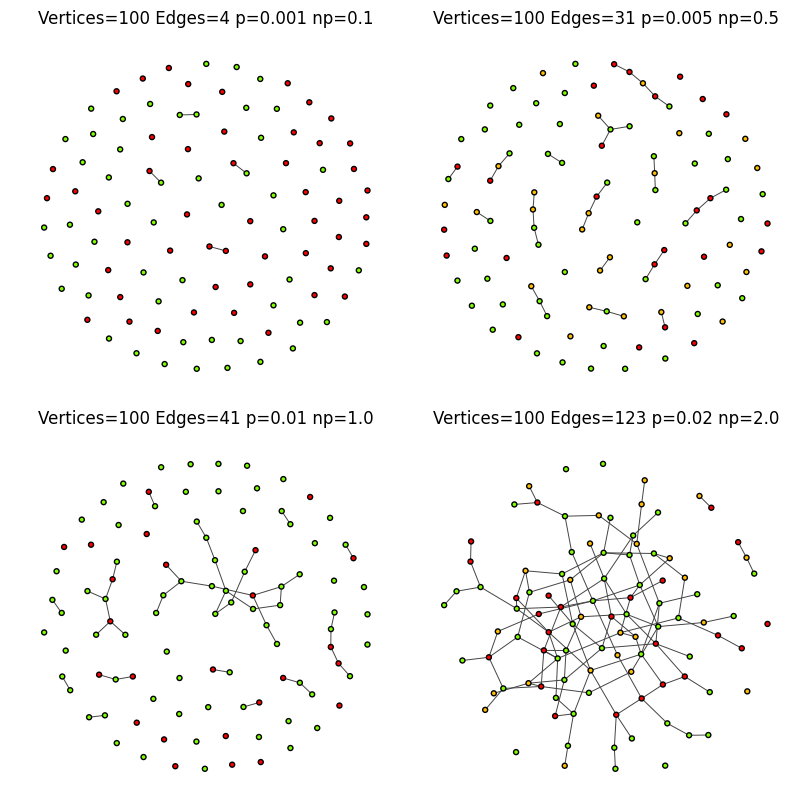

In [9]:
graph_size_prob_01 = [(100, p/100) for p in [0.1, 0.5, 1.0, 2.0]]
plot_graphs(2, 2, graph_size_prob_01)

IGRAPH U--- 25 13 -- 
IGRAPH U--- 50 54 -- 
IGRAPH U--- 100 115 -- 
IGRAPH U--- 225 303 -- 
IGRAPH U--- 500 789 -- 
IGRAPH U--- 1000 1714 -- 


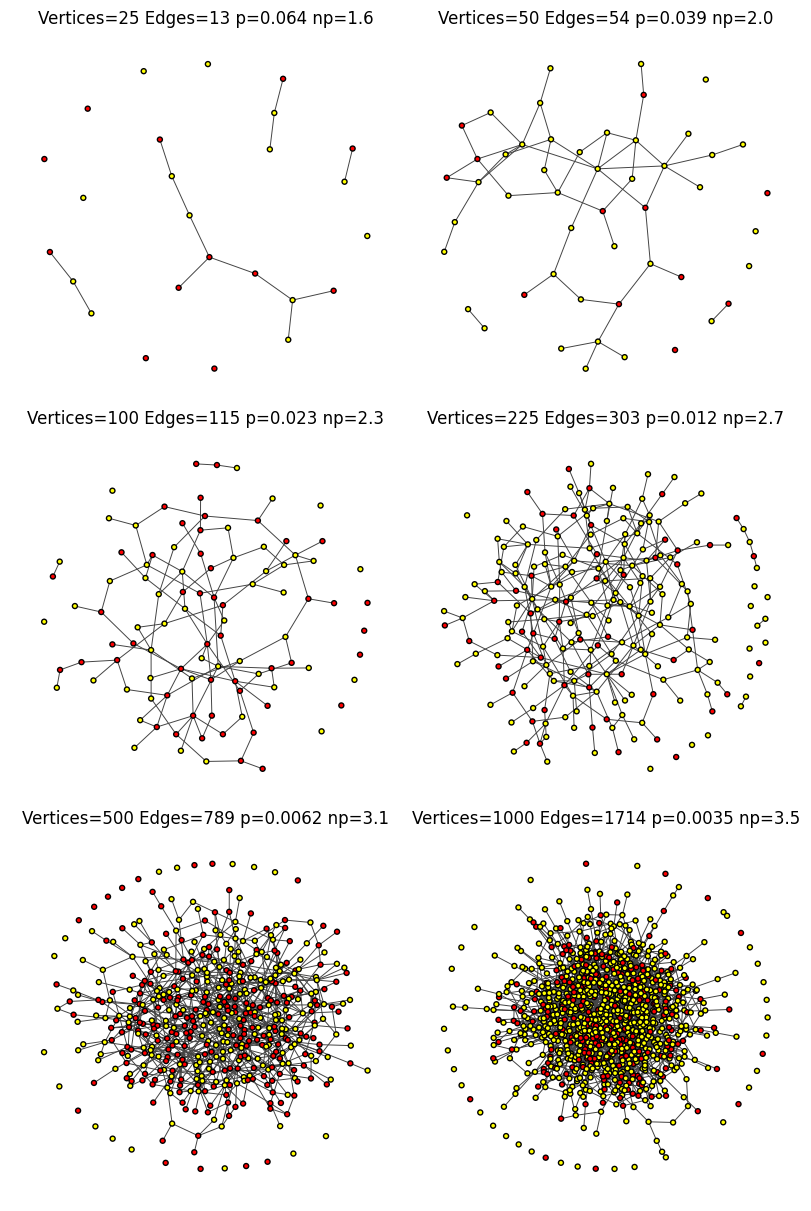

In [18]:
graph_size_prob_02 = [(n, log_on_n(0.5, n)) for n in [25, 50, 100, 225, 500, 1000]]
plot_graphs(2, 3, graph_size_prob_02)

IGRAPH U--- 25 62 -- 
IGRAPH U--- 50 139 -- 
IGRAPH U--- 100 320 -- 
IGRAPH U--- 225 917 -- 
IGRAPH U--- 500 2385 -- 
IGRAPH U--- 1000 5065 -- 


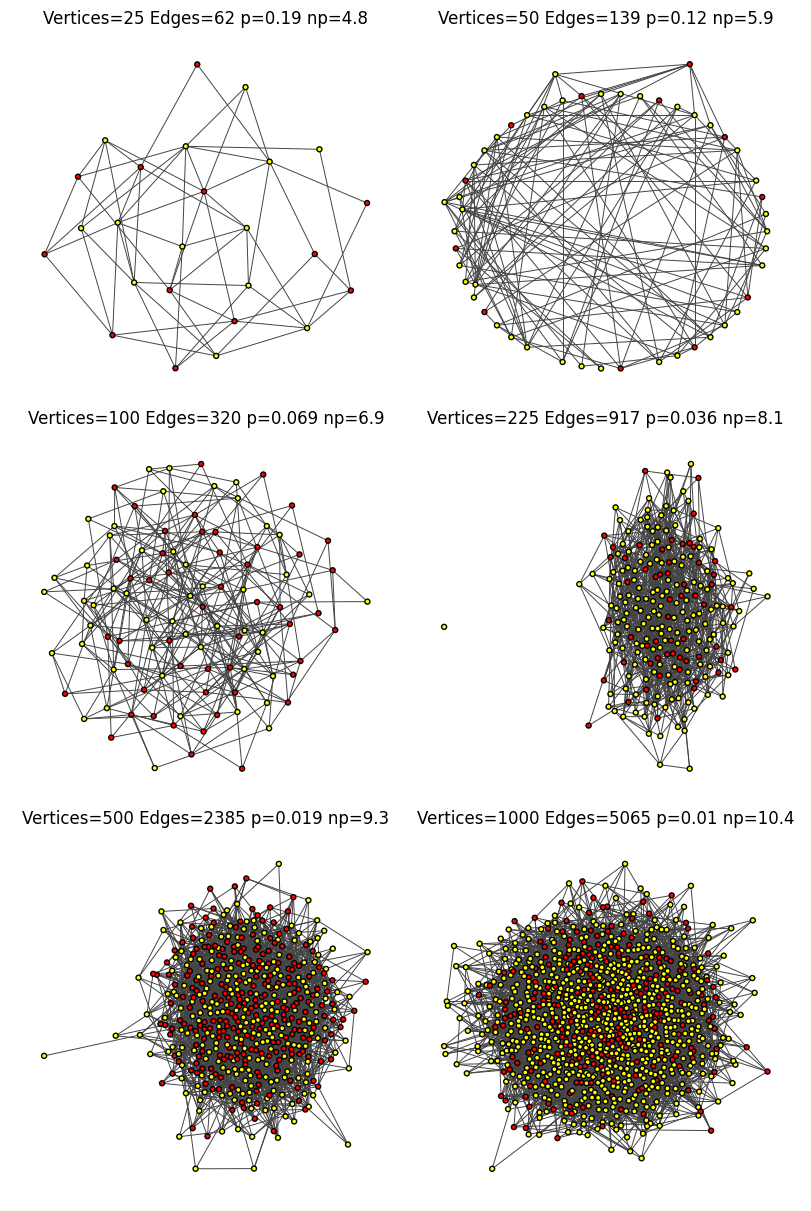

In [19]:
graph_size_prob_03 = [(n, log_on_n(1.5, n)) for n in [25, 50, 100, 225, 500, 1000]]
plot_graphs(2, 3, graph_size_prob_03)